# Week 9

**Task 1: Calculate Strong Rules**

Step 1:
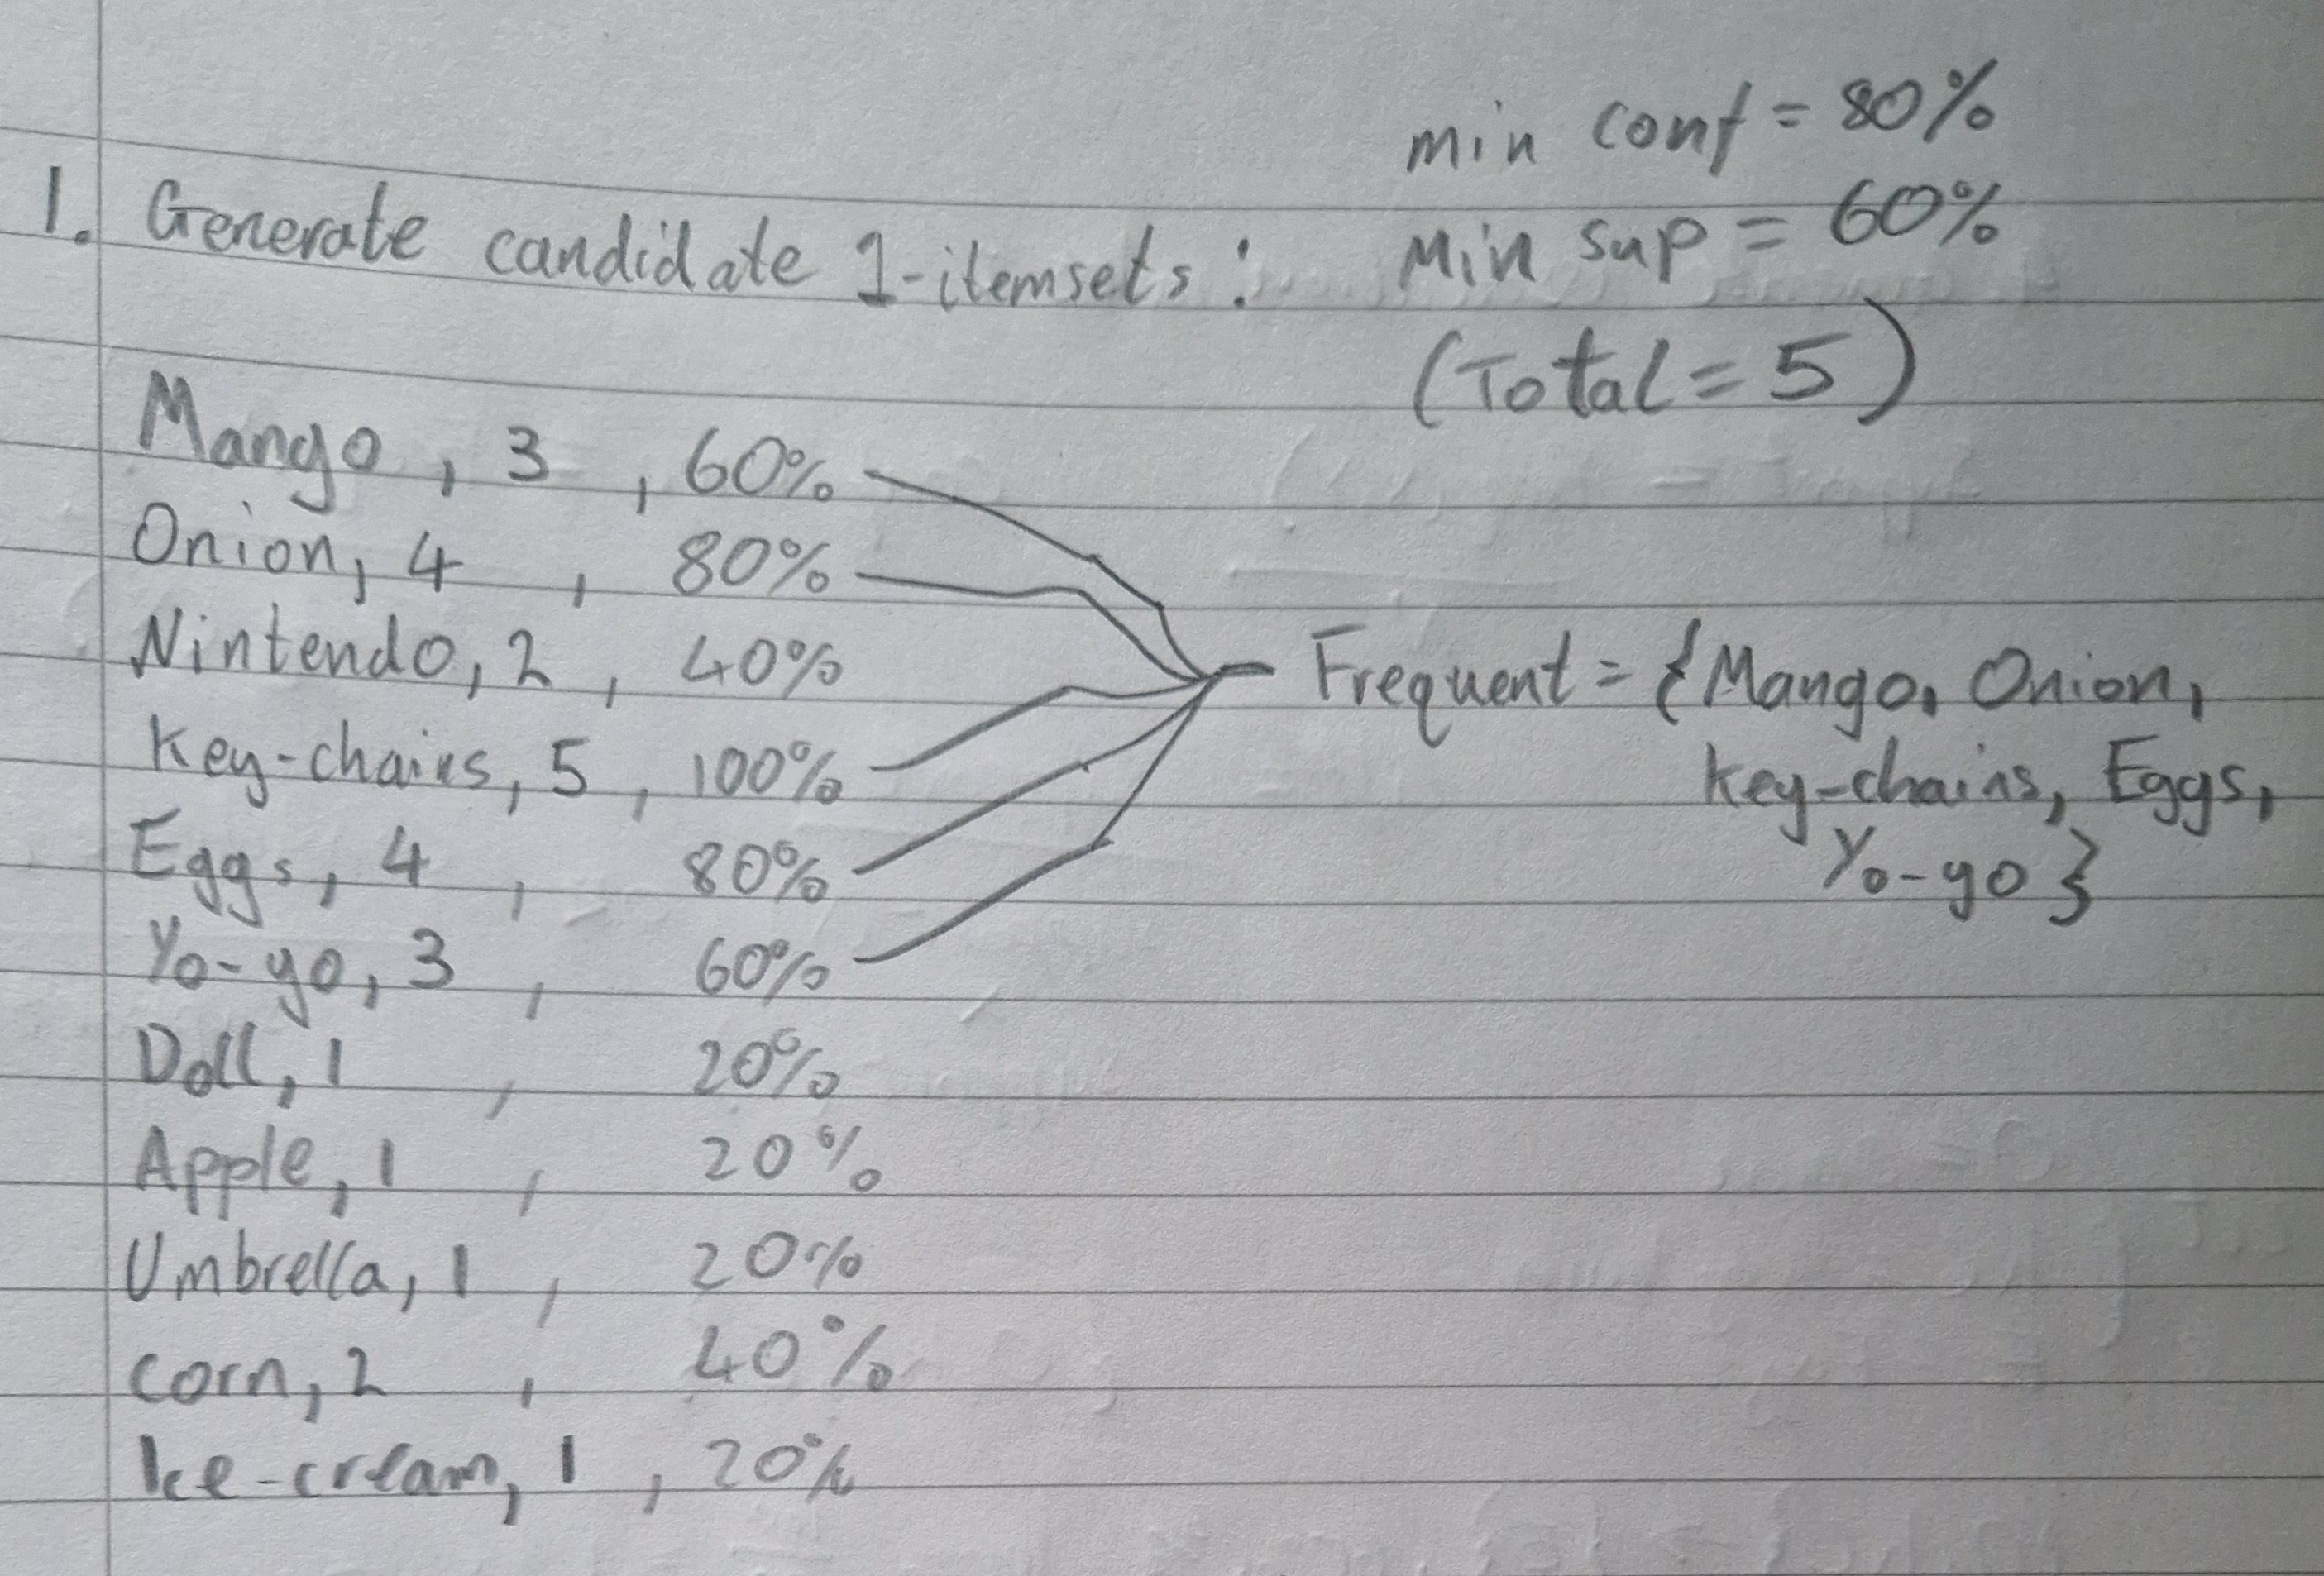

Step 2:
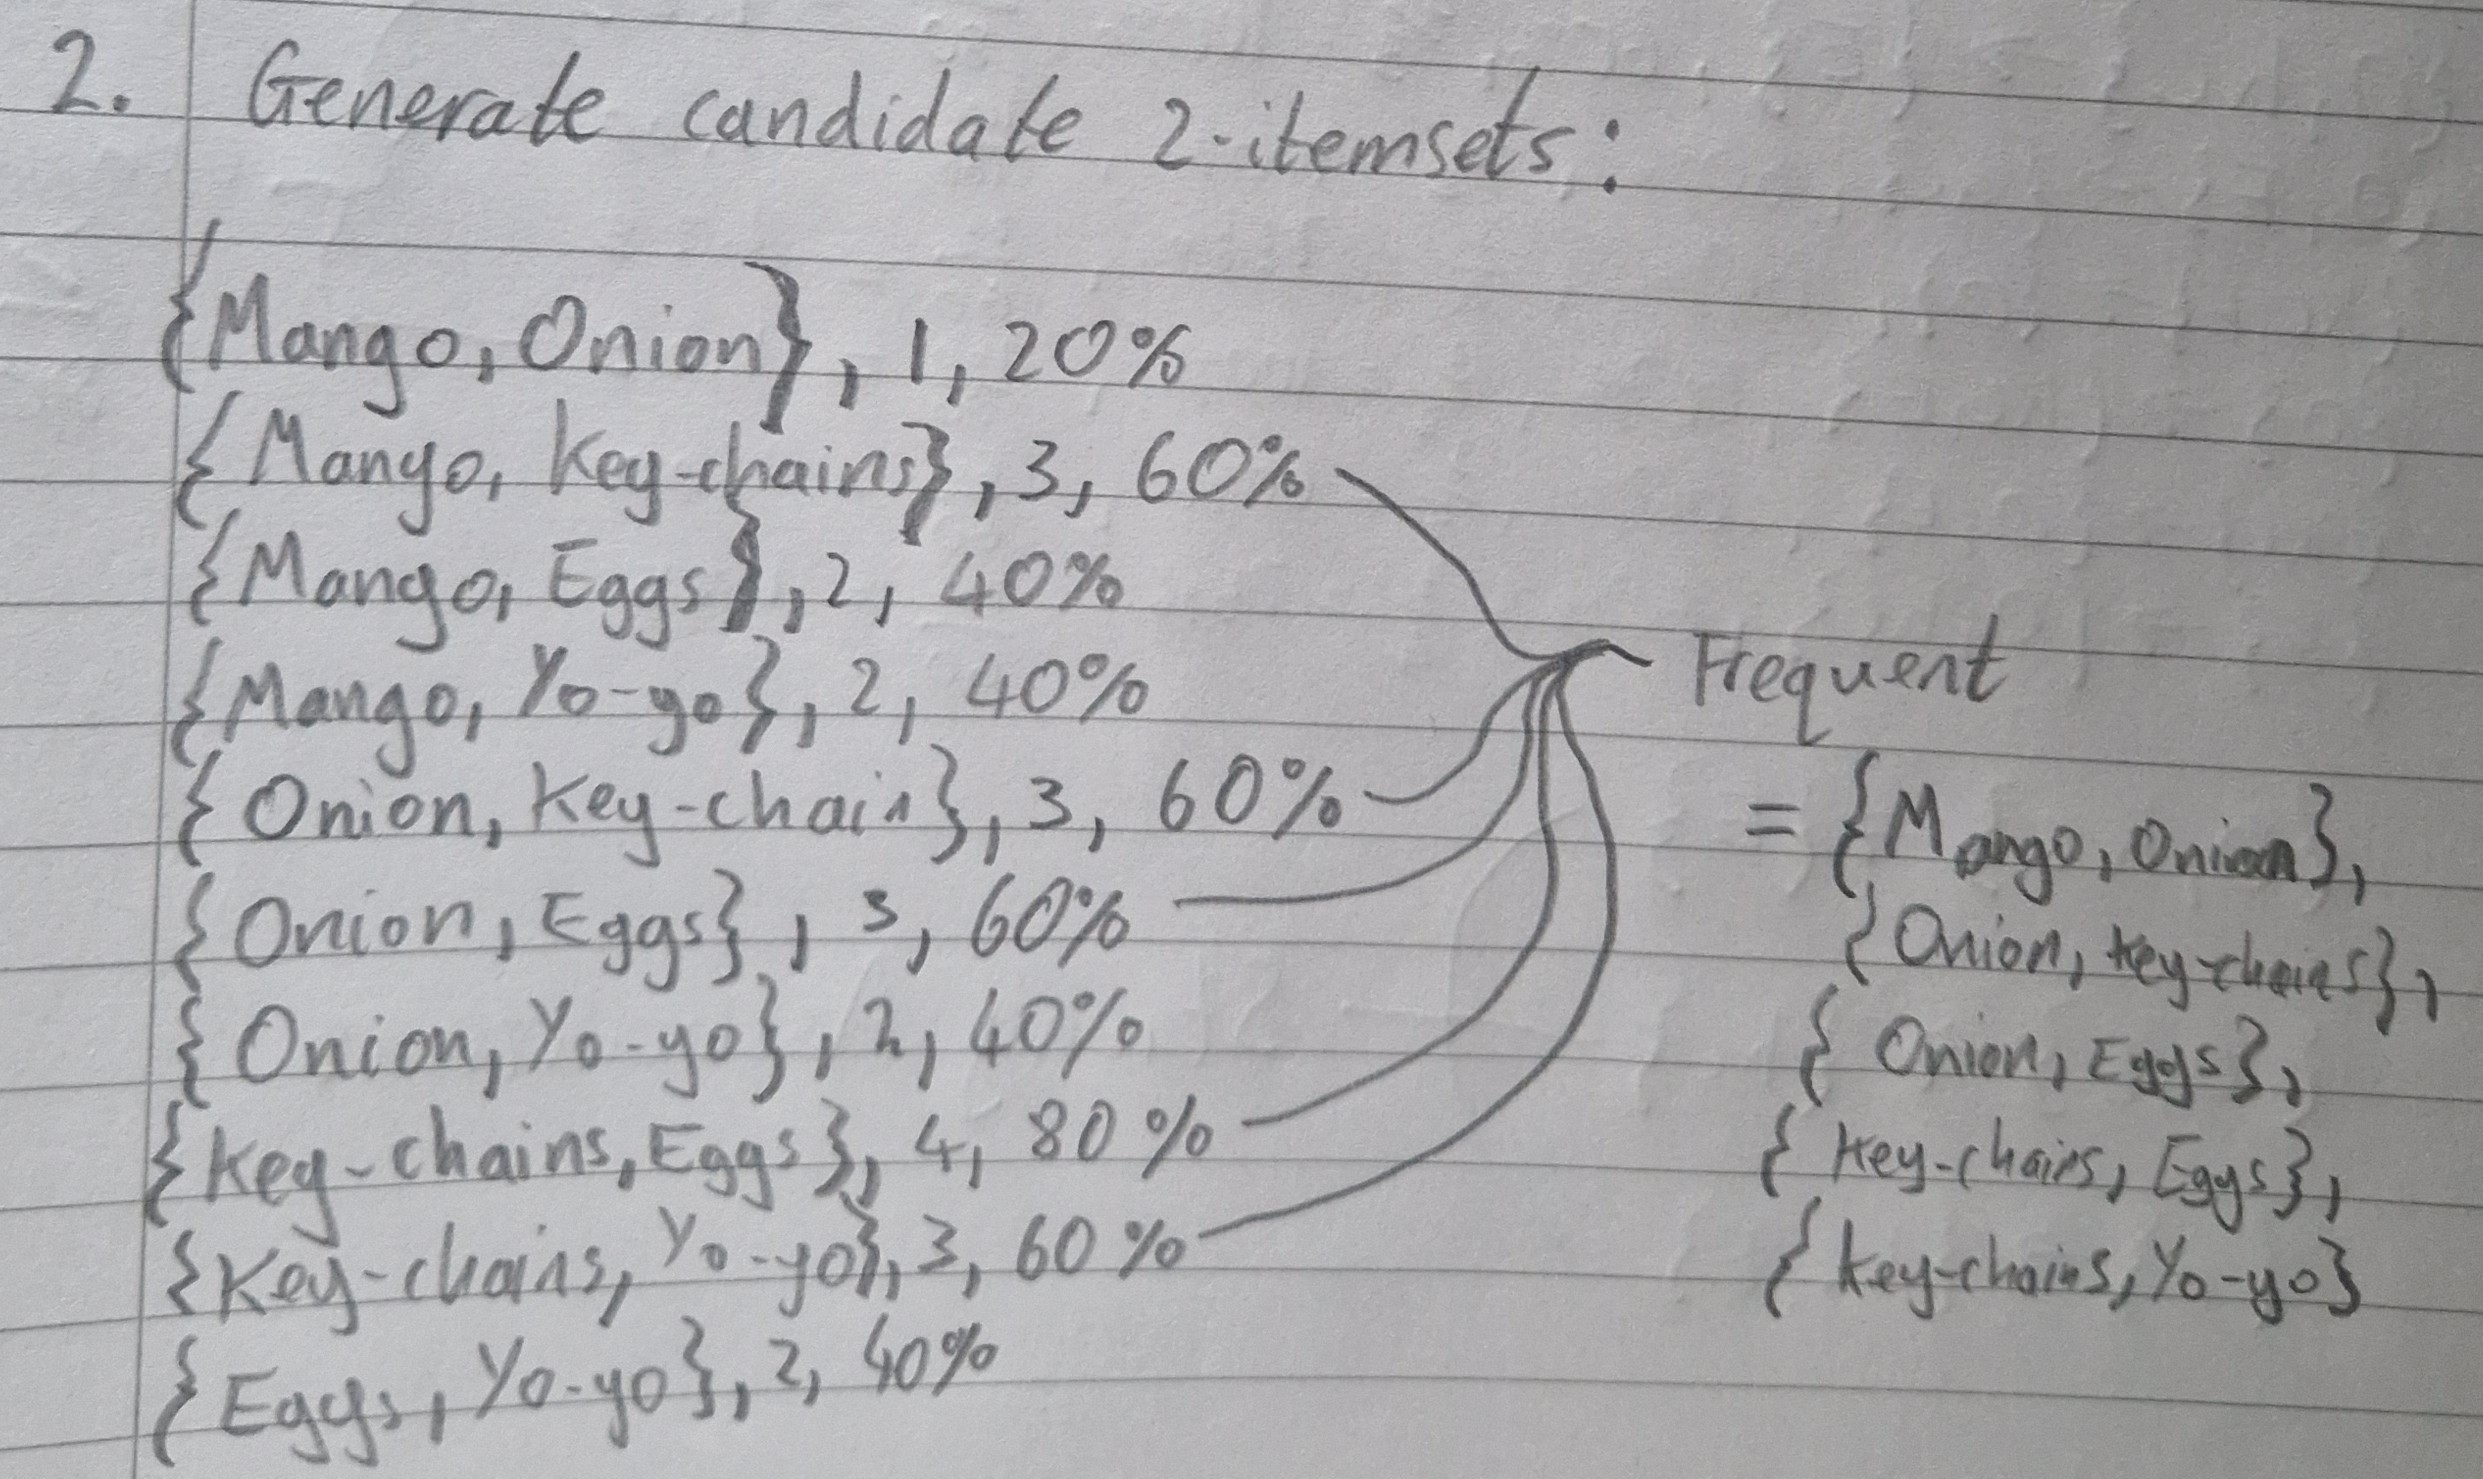

Step 3:
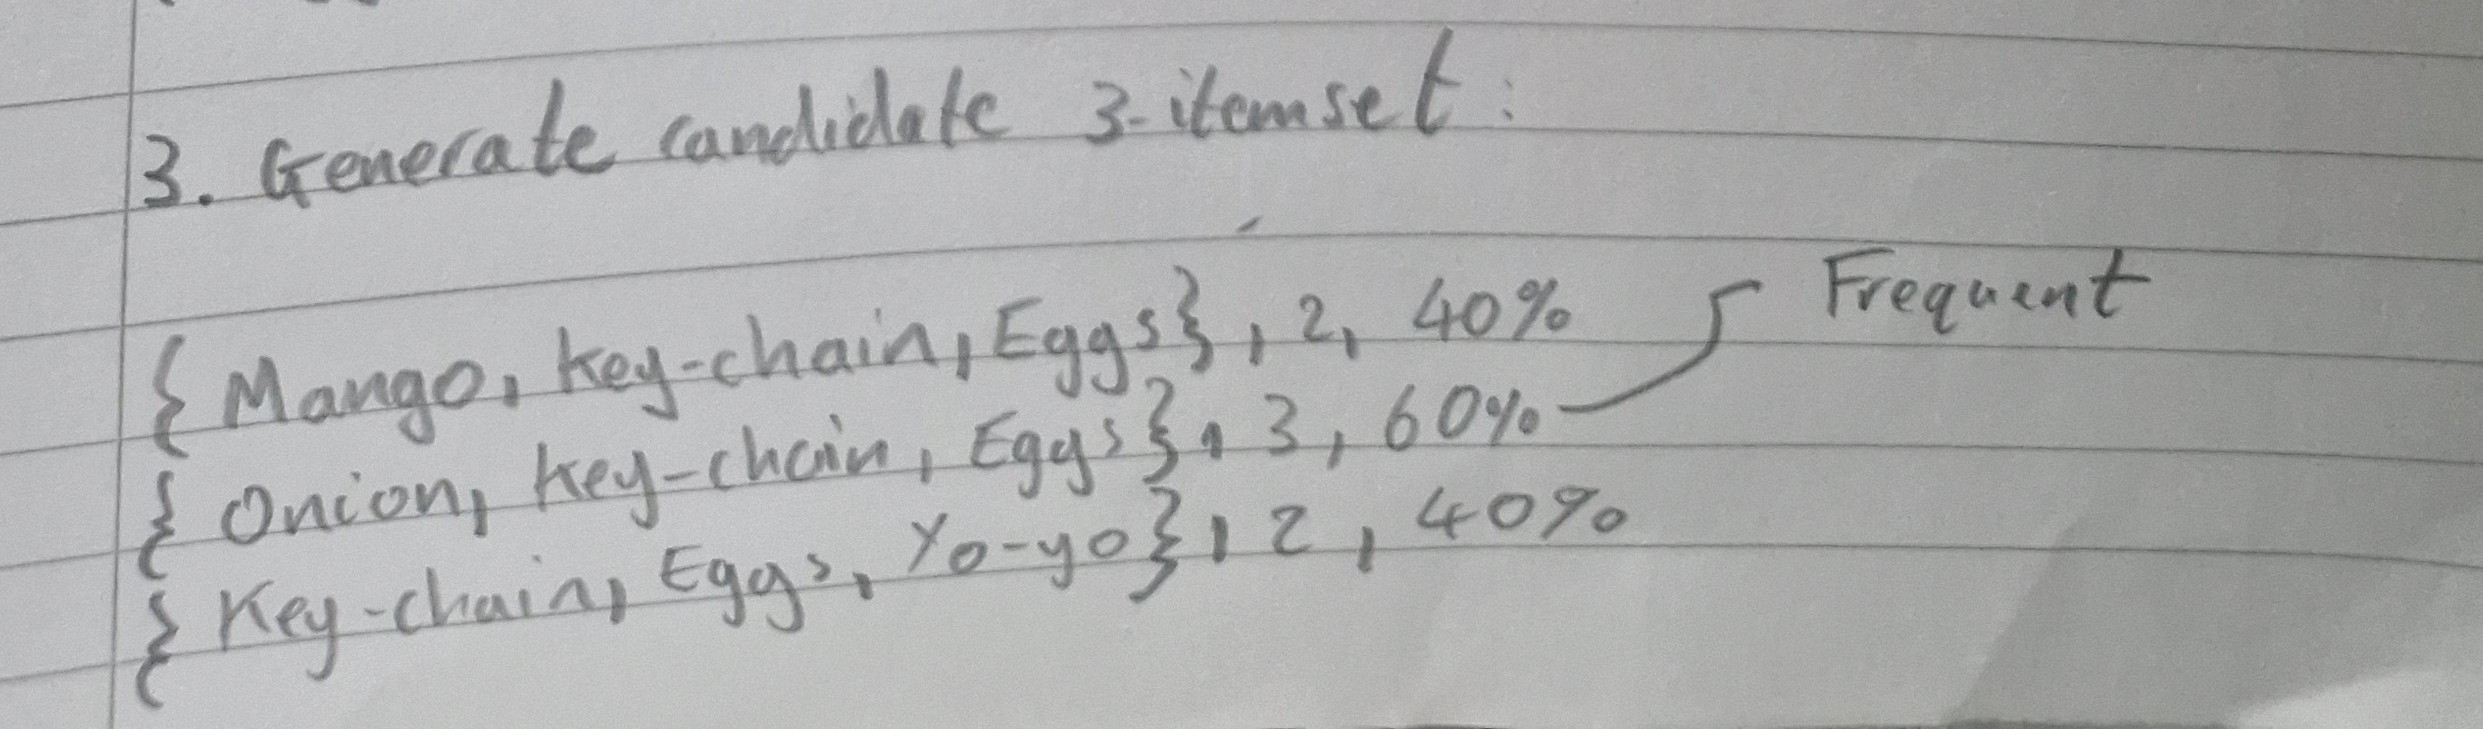

Step 4:
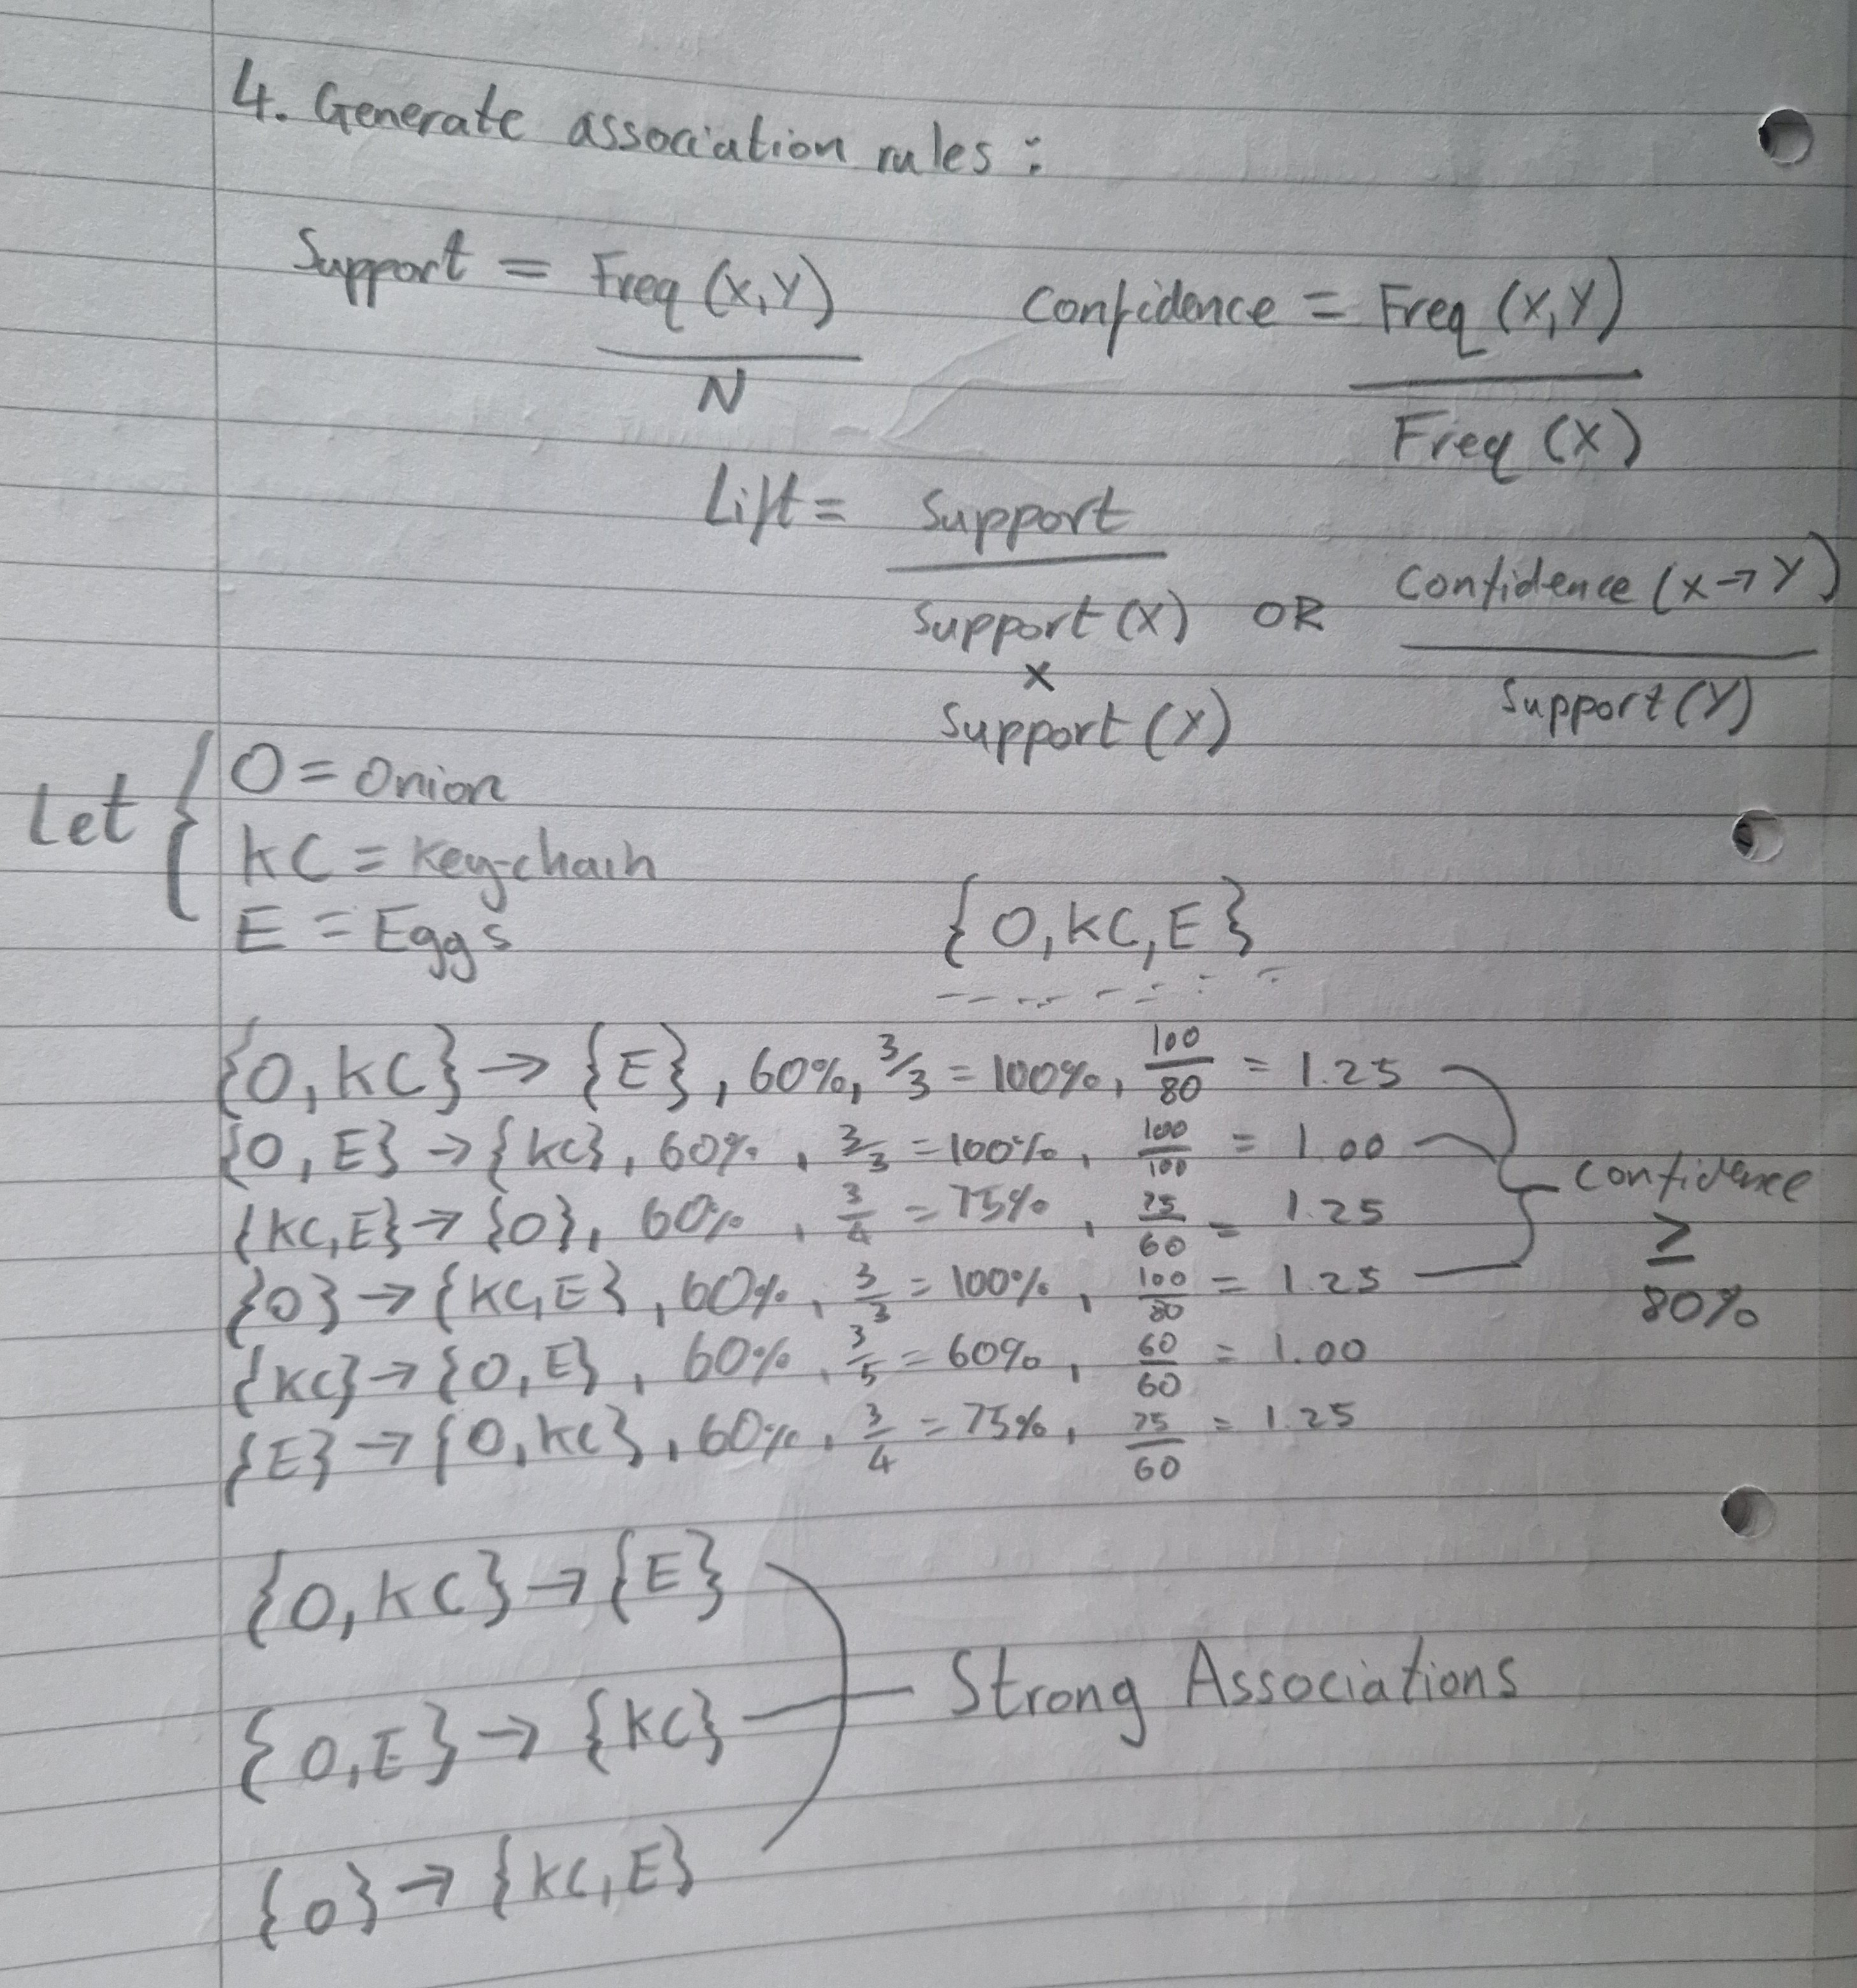

**Task 2: Implement Apriori in Python**

In [24]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
# Import groceries dataset into dataframe
df = pd.read_csv('Groceries_dataset.csv')
display(df.head())

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [26]:
# Print metadata about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [27]:
# Group by items purchased with customer and date
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()

# Print first 10 item transactions
display(transactions[0:10])

# Print number of transactions
print(f'\nNumber of transactions: {len(transactions)}')

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]


Number of transactions: 14963


In [28]:
# One-hot encoding, boolean values
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns = te.columns_)
df_encoded.head()

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   
3  ...   False    False    False               False   False        False   
4  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False        True    True     False  
1       False        True   False     False  
2       False       False   False     False  
3       False       False   False     False  
4       False       False   False     False  

[5 rows x 167 columns]

In [29]:
# Apply Apriori to find frequent itemsets
freq_itemsets = apriori(df_encoded, min_support = 0.01, use_colnames = True)
print('Total Frequent Itemsets:', freq_itemsets.shape[0])

Total Frequent Itemsets: 69


In [30]:
# Calculate and display association rules
rules = association_rules(freq_itemsets, metric = 'confidence', min_threshold = 0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print('Association Rules:', rules.shape[0])
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Association Rules: 4


antecedents   consequents   support  confidence      lift
0  (other vegetables)  (whole milk)  0.014837    0.121511  0.769430
1        (rolls/buns)  (whole milk)  0.013968    0.126974  0.804028
2              (soda)  (whole milk)  0.011629    0.119752  0.758296
3            (yogurt)  (whole milk)  0.011161    0.129961  0.822940

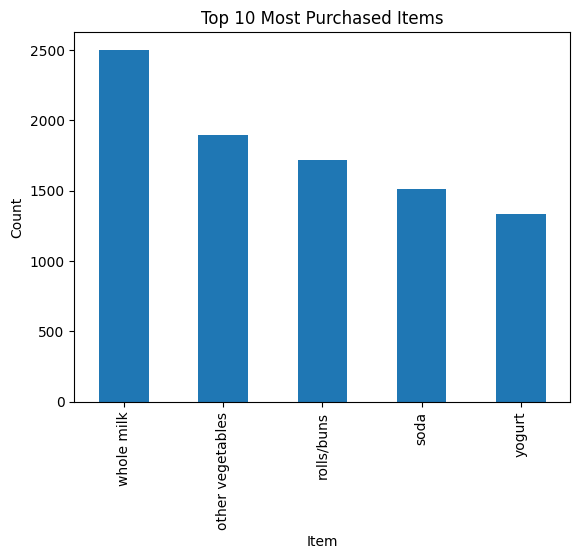

In [31]:
# Create bar chart to visualise top 10 most purchased items
import matplotlib.pyplot as plt

top_items = df['itemDescription'].value_counts().head()
top_items.plot(kind = 'bar', title = 'Top 10 Most Purchased Items')
plt.xlabel('Item')
plt.ylabel('Count')
plt.show()

**Reflection**

For this week, I completed two tasks, manually calculating strong association rules for transactions for the given dataset and implementing Apriori in Python. Manually, it is a time consuming process, however, with the use of automation and pre-built libraries, it becomes an efficient method of defining co-occurrence between items in transactions.

For the manual task, I partitioned the process into four key steps, starting with the generation of frequent 1-itemsets, 2-itemsets, and then 3-itemsets. The output of each was filtered based on the minimum support of 0.6, meaning the most frequent item sets in relation to the dataset count were chosen. After, I calculated the association rules for each variation of the set {Onion, Keychain, Eggs}, using the three metrics of support, confidence, and lift. The resulting associations with a confidence of equal-to-or-greater-than 0.8 were considered strong associations.

For the python implementation task, I followed a web-guide using the Aprriori and rule association modules from the mlxtend.frequent_patterns library. It easily calculated the association rules, identifying 4, for the imported dataset. I finished with a graph showing the top 10 purchased items by count.